# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create blank columns for the necessary fields.

cities_df = pd.DataFrame(cities).rename(columns={0:'City'})

cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"] = ""

cities_df


,City,Cloudiness,Country,Date,Humidity,latitude,longitude,Max Temp,Wind Speed
0,baymak,,,,,,,,
1,puerto quijarro,,,,,,,,
2,baykit,,,,,,,,
3,saint-philippe,,,,,,,,
4,bolungarvik,,,,,,,,
5,port elizabeth,,,,,,,,
6,kefamenanu,,,,,,,,
7,mount isa,,,,,,,,
8,carnarvon,,,,,,,,
9,hithadhoo,,,,,,,,


In [4]:
# Build query Url
units = "imperial"
base_url = "http://api.openweathermap.org/data/2.5/weather?appid="+ api_key + "&units=" + units + "&cnt=50&q="

print(base_url)


http://api.openweathermap.org/data/2.5/weather?appid=cbb2f28122569d3c9c1c0bd9780b3053&units=imperial&cnt=50&q=


In [5]:
citycount = 0
print("Beginning Data Retrieval  ")
print("---------------------------------------")
for index,row in cities_df.iterrows():
    citycount+= 1
    query_url = base_url + row[0]
    try:
        weather_response = requests.get(query_url)
        citydata = weather_response.json()
        #Print and save data into DataFrame
        print(f"Processing Record {citycount}| {row[0]}")
        cities_df.set_value(index, "City", citydata['name'])
        cities_df.set_value(index, "Cloudiness", int(citydata['clouds']['all']))
        cities_df.set_value(index, "Country", citydata['sys']['country'])
        cities_df.set_value(index, "Date", int(citydata['dt']))
        cities_df.set_value(index, "Humidity", int(citydata['main']['humidity']))
        cities_df.set_value(index, "Latitude", int(citydata['coord']['lat']))
        cities_df.set_value(index, "Longitude", int(citydata['coord']['lon']))
        cities_df.set_value(index, "Max Temp", int(citydata['main']['temp_max']))
        cities_df.set_value(index, "Wind Speed", int(citydata['wind']['speed']))
    except(KeyError, IndexError):
        print(f"City not found. Skipping...")
              

Beginning Data Retrieval  
---------------------------------------
Processing Record 1| baymak
Processing Record 2| puerto quijarro


/Users/ericH/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/Users/ericH/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Users/ericH/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/ericH/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/Users/ericH/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is d

Processing Record 3| baykit
Processing Record 4| saint-philippe
Processing Record 5| bolungarvik
City not found. Skipping...
Processing Record 6| port elizabeth
Processing Record 7| kefamenanu
Processing Record 8| mount isa
Processing Record 9| carnarvon
Processing Record 10| hithadhoo
Processing Record 11| freeport
Processing Record 12| krasnoselkup
City not found. Skipping...
Processing Record 13| saskylakh
Processing Record 14| mar del plata
Processing Record 15| albany
Processing Record 16| kaseda
Processing Record 17| esparta
Processing Record 18| sao filipe
Processing Record 19| saratoga springs
Processing Record 20| new norfolk
Processing Record 21| kodiak
Processing Record 22| tezu
Processing Record 23| airai
Processing Record 24| ilinsko-podomskoye
City not found. Skipping...
Processing Record 25| yellowknife
Processing Record 26| provideniya
Processing Record 27| manta
Processing Record 28| hami
Processing Record 29| hasaki
Processing Record 30| fortuna
Processing Record 31| 

Processing Record 235| nioro
Processing Record 236| biak
Processing Record 237| satitoa
City not found. Skipping...
Processing Record 238| amderma
City not found. Skipping...
Processing Record 239| sorong
Processing Record 240| mahroni
Processing Record 241| lapeer
Processing Record 242| camapua
Processing Record 243| hammerfest
Processing Record 244| pangnirtung
Processing Record 245| gangotri
City not found. Skipping...
Processing Record 246| quesnel
Processing Record 247| nefteyugansk
Processing Record 248| nguiu
City not found. Skipping...
Processing Record 249| port augusta
Processing Record 250| shaoxing
Processing Record 251| san luis
Processing Record 252| norman wells
Processing Record 253| flinders
Processing Record 254| sindand
City not found. Skipping...
Processing Record 255| portland
Processing Record 256| burica
City not found. Skipping...
Processing Record 257| kegayli
City not found. Skipping...
Processing Record 258| qasigiannguit
Processing Record 259| ahuimanu
Proce

Processing Record 465| aurad
Processing Record 466| rungata
City not found. Skipping...
Processing Record 467| iskateley
Processing Record 468| hovd
Processing Record 469| muroto
Processing Record 470| tuatapere
Processing Record 471| moree
Processing Record 472| aguas de lindoia
Processing Record 473| uvinza
Processing Record 474| sawakin
Processing Record 475| yuncheng
Processing Record 476| ossora
Processing Record 477| great yarmouth
Processing Record 478| buraydah
Processing Record 479| adana
Processing Record 480| lorengau
Processing Record 481| ankang
Processing Record 482| lithgow
Processing Record 483| key west
Processing Record 484| mae hong son
Processing Record 485| jardim
Processing Record 486| kandi
Processing Record 487| maraa
Processing Record 488| roebourne
Processing Record 489| irbit
Processing Record 490| deputatskiy
Processing Record 491| marabba
Processing Record 492| yulara
Processing Record 493| lensk
Processing Record 494| bud
Processing Record 495| esil
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Save to csv
cities_df = cities_df.dropna(how='any')
cities_df = cities_df.reset_index(drop=True)
cities_df.to_csv(output_data_file)
cities_df

,City,Cloudiness,Country,Date,Humidity,latitude,longitude,Max Temp,Wind Speed,Latitude,Longitude
0,Baymak,80,RU,1551851098,92,,,31,14,52.0,58.0
1,Puerto Quijarro,36,BO,1551851099,76,,,80,3,-19.0,-57.0
2,Baykit,36,RU,1551851099,68,,,17,11,61.0,96.0
3,Saint-Philippe,75,CA,1551851097,78,,,15,10,45.0,-73.0
4,Port Elizabeth,1,US,1551851071,63,,,28,13,39.0,-74.0
5,Kefamenanu,48,ID,1551851099,97,,,74,2,-9.0,124.0
6,Mount Isa,40,AU,1551848400,16,,,96,12,-20.0,139.0
7,Carnarvon,0,ZA,1551851099,31,,,64,2,-30.0,22.0
8,Hithadhoo,32,MV,1551851100,100,,,80,7,0.0,73.0
9,Freeport,68,BS,1551851100,100,,,69,19,26.0,-78.0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

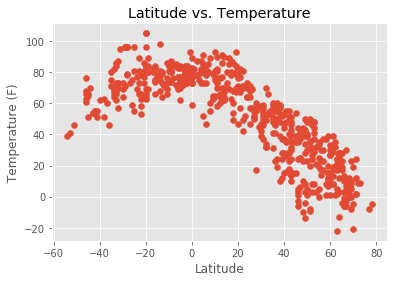

In [10]:
from datetime import datetime
# date = datetime.utcfromtimestamp(int(cities_df['Date'])).strftime('%Y-%m-%d %H:%M:%S')

plt.scatter(cities_df['Latitude'],cities_df['Max Temp'])
plt.title(f"Latitude vs. Temperature")
# plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("output_data/LatvsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

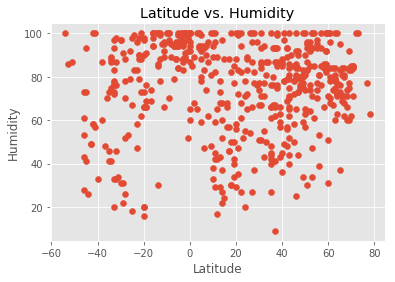

In [11]:
# date = datetime.utcfromtimestamp(int(cities_df['Date'])).strftime('%Y-%m-%d %H:%M:%S')

plt.scatter(cities_df['Latitude'],cities_df['Humidity'])
plt.title(f"Latitude vs. Humidity")
# plt.title(f"Temperature (F) vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.style.use('ggplot')
plt.savefig("output_data/LatvsHum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

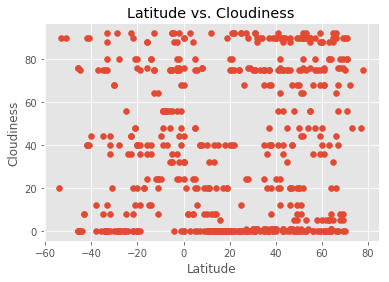

In [12]:
# date = datetime.utcfromtimestamp(int(cities_df['Date'])).strftime('%Y-%m-%d %H:%M:%S')

plt.scatter(cities_df['Latitude'],cities_df['Cloudiness'])
plt.title(f"Latitude vs. Cloudiness")
# plt.title(f"Temperature (F) vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.style.use('ggplot')
plt.savefig("output_data/LatvsCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

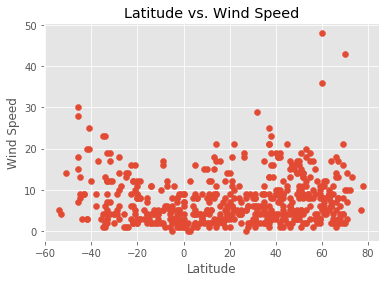

In [14]:
# date = datetime.utcfromtimestamp(int(cities_df['Date'])).strftime('%Y-%m-%d %H:%M:%S')

plt.scatter(cities_df['Latitude'],cities_df['Wind Speed'])
plt.title(f"Latitude vs. Wind Speed")
# plt.title(f"Temperature (F) vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.style.use('ggplot')
plt.savefig("output_data/LatvsWSpeed.png")
plt.show()